# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("gold.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
from sklearn.linear_model import LinearRegression
predictors = ["Open" , "High" , "Low" , "Price"]
X = df.iloc[0:411,1:5]
y = df.iloc[0:411,7]
lm = LinearRegression()
model = lm.fit(X,y)
print(model.coef_)
x_new = df.iloc[411:,1:5]
y = model.predict(x_new)
df.iloc[411:,7] = y

[ 2.  3. -1. -4.]


In [5]:
x = df.iloc[0:411,1:5] 
Y = df.iloc[0:411,8] 
model = lm.fit(x,Y)
New = model.predict(x_new)

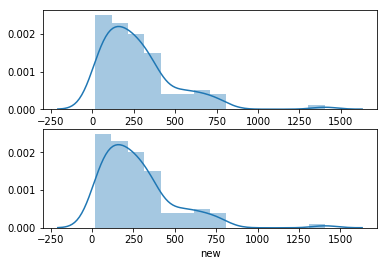

In [6]:
import seaborn as sns
plt.subplot(211)
sns.distplot(New)
plt.subplot(212)
sns.distplot(df.iloc[411:,8])

Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results


In [7]:
nifty = pd.read_csv("Nifty50.csv")
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [11]:
dfmy = pd.read_csv('PNB.csv')
dfmy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [44]:
mydf = pd.DataFrame()
mydf["Date"] = dfmy["Date" ]
mydf["Open"] = dfmy["Open Price" ]
mydf["High"] = dfmy["High Price" ]
mydf["Low"] = dfmy["Low Price" ]
mydf["Close"] = dfmy["Close Price"]
mydf["Shares Traded"] = dfmy["Total Traded Quantity"]
mydf["Turnover"] = dfmy["Turnover"]

In [45]:
Daily_Return = abs(mydf["Open"]-mydf["Close"])*mydf["Shares Traded"]
mydf["Daily Return"] = Daily_Return
mydf.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover,Daily Return
0,15-May-2017,169.95,171.30,166.2,166.80,7476618,1.263123e+09,2.355135e+07
1,16-May-2017,167.35,178.00,164.8,174.15,51532461,8.921904e+09,3.504207e+08
2,17-May-2017,173.00,173.10,164.3,165.05,26536944,4.438942e+09,2.109687e+08
3,18-May-2017,163.40,164.40,157.9,158.50,13905573,2.239613e+09,6.813731e+07
4,19-May-2017,159.50,162.25,154.1,155.20,16311602,2.570540e+09,7.013989e+07


In [91]:
mydf["Date"] = pd.to_datetime(mydf['Date'])
dm = mydf.groupby(pd.Grouper(key='Date', freq='1M')).sum()
dm.index = dm.index.strftime('%B')
price = abs(dm["Close"]-dm["Open"])*dm["Shares Traded"]
dm["Monthly Return"] = price
dm.head()

,Open,High,Low,Close,Shares Traded,Turnover,Daily Return,Monthly Return
May,2033.05,2070.40,1974.00,2011.15,222241088,3.533667e+10,1.045315e+09,4.867080e+09
June,3097.60,3127.00,3047.55,3083.95,152405525,2.227567e+10,3.089190e+08,2.080335e+09
July,3183.35,3244.40,3142.25,3200.30,171822686,2.627674e+10,5.208005e+08,2.912395e+09
August,3081.40,3125.00,3016.20,3063.40,215529414,3.191508e+10,5.961647e+08,3.879529e+09
September,2959.80,2984.65,2911.45,2938.75,122131547,1.713744e+10,2.209530e+08,2.570869e+09


In [94]:
import statsmodels.formula.api as smf
print("Beta values of monthly Return ")
y = dm["Monthly Return"]
x = dm[["Open" , "High" , "Low" , "Close"]]
model = smf.ols("y~x" ,data = dm)
model = model.fit()
model.params

Beta values of monthly Return 


Intercept    1.972677e+09
x[0]         2.244502e+08
x[1]         2.059855e+08
x[2]        -2.907049e+08
x[3]        -1.476547e+08
dtype: float64

In [95]:
print("Beta values of Daily Return ")
y = mydf["Daily Return"]
x = mydf[["Open" , "High" , "Low" , "Close"]]
model = smf.ols("y~x" ,data = mydf)
model = model.fit()
model.params

Beta values of Daily Return 


Intercept    2.675392e+07
x[0]        -9.681133e+06
x[1]         6.525576e+07
x[2]        -1.030434e+08
x[3]         4.483416e+07
dtype: float64

For Nifty Stock


In [97]:
Daily_Return = abs(nifty["Open"]-nifty["Close"])*nifty["Shares Traded"]
nifty["Daily Return"] = Daily_Return
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Daily Return
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,1.720193e+09
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,8.800108e+09
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,1.726627e+09
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,4.734340e+09
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,1.091418e+10


In [105]:
nifty["Date"] = pd.to_datetime(nifty['Date'])
dm_nifty = nifty.groupby(pd.Grouper(key='Date', freq='1M')).sum()
dm_nifty.index = dm_nifty.index.strftime('%B')
price = abs(dm_nifty["Close"]-dm_nifty["Open"])*dm_nifty["Shares Traded"]
dm_nifty["Monthly Return"] = price
dm_nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Daily Return,Monthly Return
May,123350.50,123923.35,122926.70,123481.25,3033425674,152111.08,1.423955e+11,3.966204e+11
June,202049.90,202510.25,201219.75,201746.05,3667933334,194462.80,1.006122e+11,1.114502e+12
July,206712.80,207362.90,205982.35,206852.50,3849451776,208783.83,1.039661e+11,5.377684e+11
August,208332.50,208864.70,207149.85,207924.85,4296596163,223540.74,1.902627e+11,1.751507e+12
September,209966.65,210486.50,208772.15,209536.25,4294085247,218201.28,1.814280e+11,1.848174e+12


In [107]:
print("Beta values of monthly Return ")
y = dm_nifty["Monthly Return"]
x = dm_nifty[["Open" , "High" , "Low" , "Close"]]
model = smf.ols("y~x" ,data = dm_nifty)
model = model.fit()
model.params

Beta values of monthly Return 


Intercept    9.421065e+11
x[0]         6.587112e+09
x[1]        -4.182292e+09
x[2]        -4.578196e+09
x[3]         2.168416e+09
dtype: float64

In [109]:
print("Beta values of Daily Return ")
y = nifty["Daily Return"]
x = nifty[["Open" , "High" , "Low" , "Close"]]
model = smf.ols("y~x" ,data = nifty)
model = model.fit()
model.params

Beta values of Daily Return 


Intercept   -3.050113e+10
x[0]        -5.084607e+07
x[1]         3.268735e+08
x[2]        -1.855716e+08
x[3]        -8.847512e+07
dtype: float64

### An one unit increase in regressor x decreases the estimated mean of dependent variable y by Beta units